# 그래프를 활용한 탐색적 분석

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.api import qqplot,add_constant
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from matplotlib import gridspec
from sklearn.metrics import confusion_matrix
from statsmodels.api import Logit
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score,roc_curve,auc
import seaborn as sns

%matplotlib inline

#경고문구 무시
import warnings
warnings.filterwarnings('ignore')

matplotlib.rcParams['axes.unicode_minus']=False
matplotlib.rc('font',family='Malgun Gothic')

In [2]:
#파일 읽어옴
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='MS949')

display(df.head())

#결측치는 없음
print(df.isnull().sum())
from collections import Counter



,PLATE_NO,ROLLING_DATE,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,...,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,PB562774,2008-08-01:00:00:15,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,116,1133,59,282,1133,934,적용,8,2조
1,PB562775,2008-08-01:00:00:16,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,...,1144,122,1135,53,283,1135,937,적용,8,2조
2,PB562776,2008-08-01:00:00:59,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1129,116,1121,55,282,1121,889,적용,8,3조
3,PB562777,2008-08-01:00:01:24,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,...,1152,125,1127,68,316,1127,885,적용,8,3조
4,PB562778,2008-08-01:00:01:44,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,...,1140,134,1128,48,314,1128,873,적용,8,1조


PLATE_NO             0
ROLLING_DATE         0
SCALE                0
SPEC                 0
STEEL_KIND           0
PT_THK               0
PT_WDTH              0
PT_LTH               0
PT_WGT               0
FUR_NO               0
FUR_NO_ROW           0
FUR_HZ_TEMP          0
FUR_HZ_TIME          0
FUR_SZ_TEMP          0
FUR_SZ_TIME          0
FUR_TIME             0
FUR_EXTEMP           0
ROLLING_TEMP_T5      0
HSB                  0
ROLLING_DESCALING    0
WORK_GR              0
dtype: int64


In [3]:
#불필요 데이터 제거
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
display(df.head())

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1140,134,1128,48,314,1128,873,적용,8,1조


In [4]:
list_char=list(df.select_dtypes(include='object').columns)
print('범주형 변수')
print(list_char,'\n\n')

print('연속형 변수')
list_float=list(df.select_dtypes(exclude='object').columns)
print(list_float,'\n\n')

for v_var in list_char:
    print('\n\n변수',v_var,'의 Level은\n',Counter(df[v_var]))

범주형 변수
['SCALE', 'SPEC', 'STEEL_KIND', 'FUR_NO', 'HSB', 'WORK_GR'] 


연속형 변수
['PT_THK', 'PT_WDTH', 'PT_LTH', 'PT_WGT', 'FUR_HZ_TEMP', 'FUR_HZ_TIME', 'FUR_SZ_TEMP', 'FUR_SZ_TIME', 'FUR_TIME', 'FUR_EXTEMP', 'ROLLING_TEMP_T5', 'ROLLING_DESCALING'] 




변수 SCALE 의 Level은
 Counter({'양품': 489, '불량': 231})


변수 SPEC 의 Level은
 Counter({'JS-SM490YB': 84, 'LR-A': 54, 'NV-A': 48, 'PILAC-BT33': 40, 'BV-EH36-TM': 35, 'LR-AH32': 33, 'NV-A32': 33, 'JS-SM490A': 31, 'COMMON': 28, 'BV-B': 28, 'KR-A': 27, 'SA283-C': 21, 'JS-SS400': 19, 'AB/EH36-TM': 17, 'GL-E36-TM': 16, 'BV-AH32': 14, 'LR-B': 13, 'NK-KA32': 12, 'GL-A36-TM': 11, 'GL-A32': 8, 'GL-D36-TM': 8, 'KS-SM490B': 7, 'AB/A': 7, 'GL-E32-TM': 6, 'AB/B': 6, 'A283-C': 6, 'NV-E36-TM': 5, 'JS-SM400B': 5, 'KS-SS400': 5, 'JS-SM490YA': 5, 'AB/AH32': 5, 'KS-SM490A': 5, 'NK-KA': 5, 'NV-D36-TM': 5, 'KS-SM400B': 4, 'KS-SM400A': 4, 'V42JBN3': 4, 'GL-A32-TM': 4, 'NV-D32-TM': 4, 'NV-B': 3, 'KR-AH32': 3, 'GL-A': 3, 'NV-A32-TM': 3, 'BV-AH32-TM': 3, 'BV-AH36-TL': 3, '

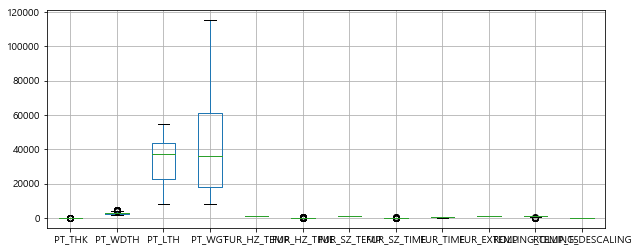

In [5]:
#이상치 확인
display(df.boxplot(figsize=(10,4)))



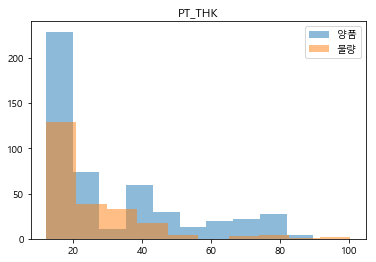

In [6]:
def fun_plot_hist(data,var):
    plt.hist(data[df['SCALE']=='양품'][var],label='양품',alpha=0.5)
    plt.hist(data[df['SCALE']=='불량'][var],label='불량',alpha=0.5)
    plt.title(var)
    plt.legend()

fun_plot_hist(df,list_float[0])

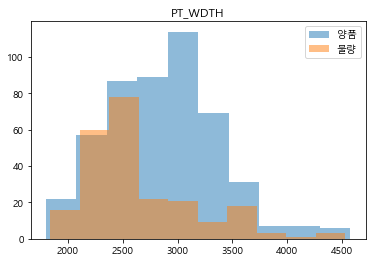

In [7]:
fun_plot_hist(df,list_float[1])

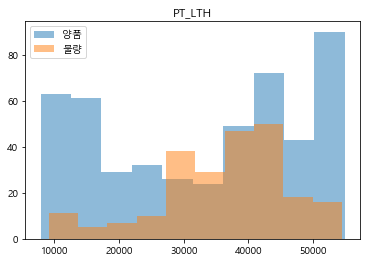

In [8]:
fun_plot_hist(df,list_float[2])

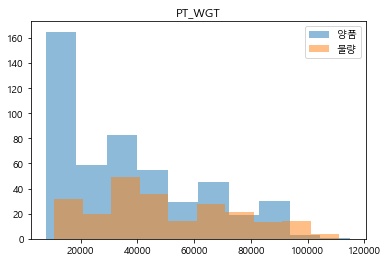

In [9]:
fun_plot_hist(df,list_float[3])

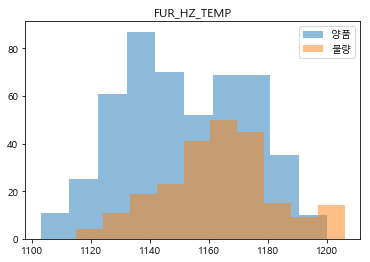

In [10]:
fun_plot_hist(df,list_float[4])

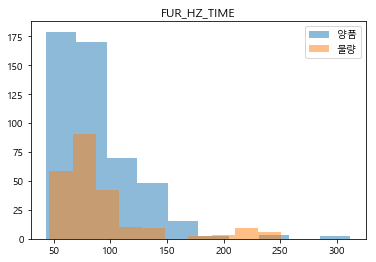

In [11]:
fun_plot_hist(df,list_float[5])

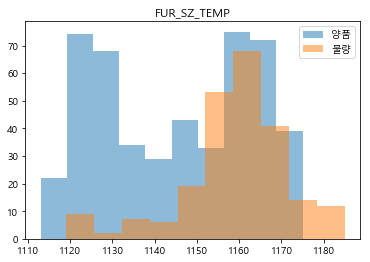

In [12]:
fun_plot_hist(df,list_float[6])

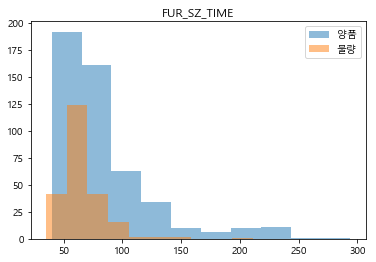

In [13]:
fun_plot_hist(df,list_float[7])

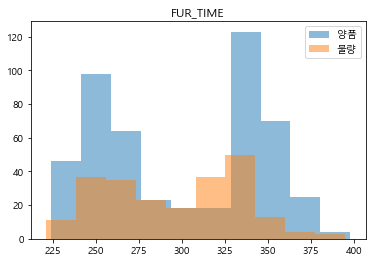

In [14]:
fun_plot_hist(df,list_float[8])

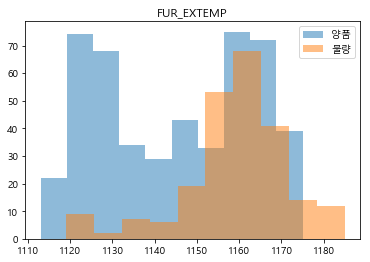

In [15]:
fun_plot_hist(df,list_float[9])

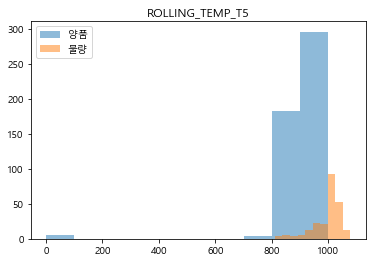

In [16]:
fun_plot_hist(df,list_float[10])

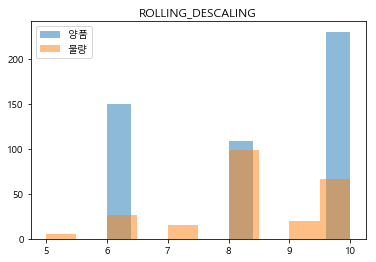

In [17]:
fun_plot_hist(df,list_float[11])

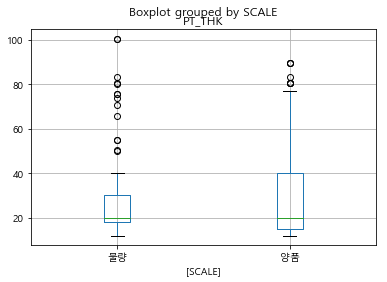

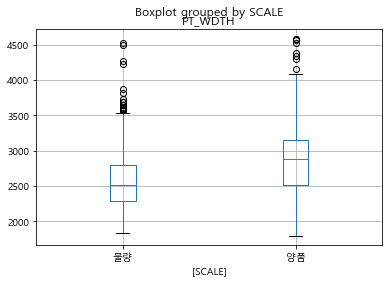

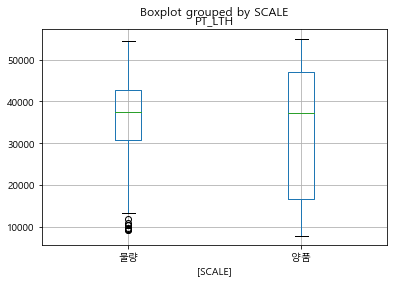

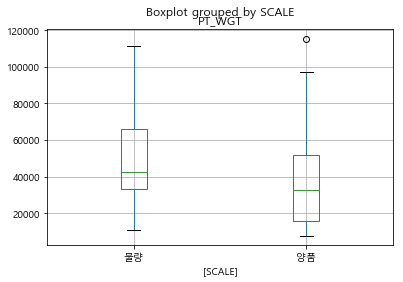

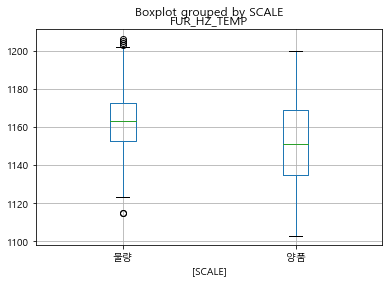

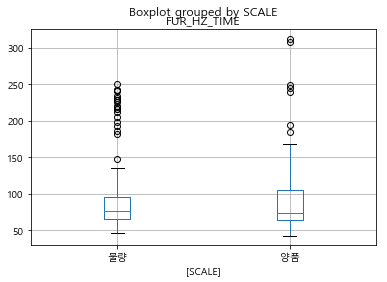

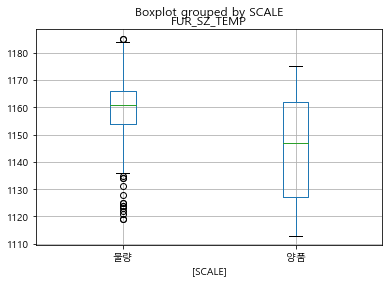

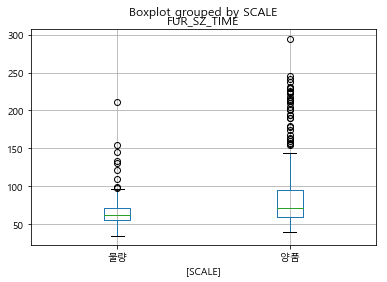

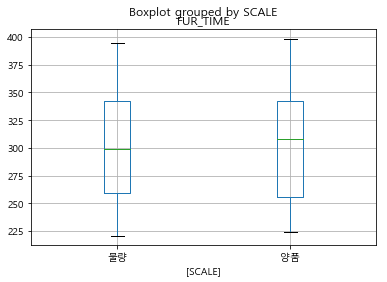

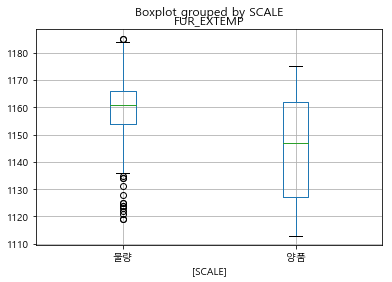

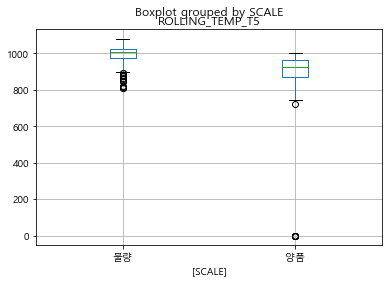

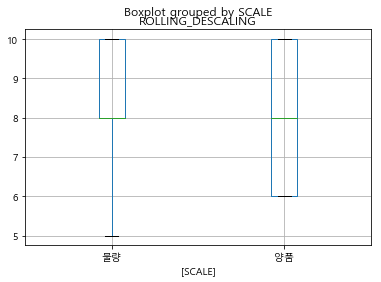

In [18]:
for i in list_float:
    df.boxplot(column=i,by=['SCALE'])

In [19]:
#이상치 제거

df2=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]



In [20]:
df2[list_float].corr()

,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING
PT_THK,1.000000,-0.312566,-0.861997,-0.393648,-0.522945,0.178954,-0.694562,0.127111,0.411048,-0.694562,-0.504217,-0.836386
PT_WDTH,-0.312566,1.000000,0.118260,0.027201,0.182672,-0.134026,0.231004,0.010959,-0.397637,0.231004,-0.112066,0.341493
PT_LTH,-0.861997,0.118260,1.000000,0.449982,0.473625,-0.097482,0.646681,-0.085081,-0.251282,0.646681,0.437046,0.806529
PT_WGT,-0.393648,0.027201,0.449982,1.000000,0.149292,0.002414,0.356316,-0.200593,-0.060523,0.356316,0.421225,0.235429
FUR_HZ_TEMP,-0.522945,0.182672,0.473625,0.149292,1.000000,-0.107636,0.770476,-0.225067,-0.341201,0.770476,0.355889,0.470025
FUR_HZ_TIME,0.178954,-0.134026,-0.097482,0.002414,-0.107636,1.000000,-0.213523,0.206491,0.484841,-0.213523,-0.000424,-0.159141
FUR_SZ_TEMP,-0.694562,0.231004,0.646681,0.356316,0.770476,-0.213523,1.000000,-0.457993,-0.472974,1.000000,0.661315,0.648348
FUR_SZ_TIME,0.127111,0.010959,-0.085081,-0.200593,-0.225067,0.206491,-0.457993,1.000000,0.455643,-0.457993,-0.380018,-0.118396
FUR_TIME,0.411048,-0.397637,-0.251282,-0.060523,-0.341201,0.484841,-0.472974,0.455643,1.000000,-0.472974,-0.210986,-0.365872
FUR_EXTEMP,-0.694562,0.231004,0.646681,0.356316,0.770476,-0.213523,1.000000,-0.457993,-0.472974,1.000000,0.661315,0.648348


In [21]:
df2.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1144,116,1133,59,282,1133,934,적용,8,2조
1,양품,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1144,122,1135,53,283,1135,937,적용,8,2조
2,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1129,116,1121,55,282,1121,889,적용,8,3조
3,양품,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1152,125,1127,68,316,1127,885,적용,8,3조
4,양품,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1140,134,1128,48,314,1128,873,적용,8,1조


# 랜덤포레스트

In [22]:
#양,불->1,0
df['SCALE']=np.where(df['SCALE']=='양품',0,1)

#x,y나누기
df_y=df['SCALE']
df_x=df.drop(['SCALE'],axis=1,inplace=False)

#x변수 더미 처리
df_x=pd.get_dummies(df_x)

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

train data x size:(504, 96)
train data y size:(504,)
test data x size:(216, 96)
test data y size:(216,)



In [23]:
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}'.format(df_test_y.shape))


train data x size:(504, 96)
train data y size:(504,)
test data x size:(216, 96)
test data y size:(216,)


,n_estimator,TrainScore,TestScore
0,10,0.986,0.935
1,20,0.996,0.935
2,30,1.000,0.949
3,40,1.000,0.963
4,50,1.000,0.963
5,60,1.000,0.963
6,70,1.000,0.958
7,80,1.000,0.963
8,90,1.000,0.963
9,100,1.000,0.963


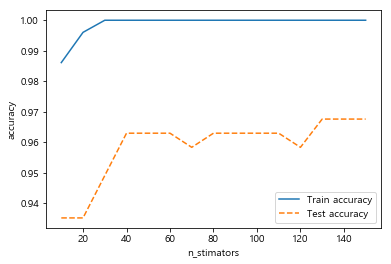

In [24]:
train_accuracy=[]
test_accuracy=[]
para_n_tree=[n_tree*10 for n_tree in range(1,16)]




for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimator']=para_n_tree
df_accuracy_n['TrainScore']=train_accuracy
df_accuracy_n['TestScore']=test_accuracy

display(df_accuracy_n.round(3))

plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_stimators')
plt.legend()

#n=50

,depth,TrainScore,TestScore
0,1,0.687,0.671
1,2,0.877,0.889
2,3,0.905,0.898
3,4,0.938,0.926
4,5,0.958,0.935
5,6,0.962,0.958
6,7,0.964,0.958
7,8,0.970,0.963
8,9,0.982,0.958
9,10,0.996,0.954


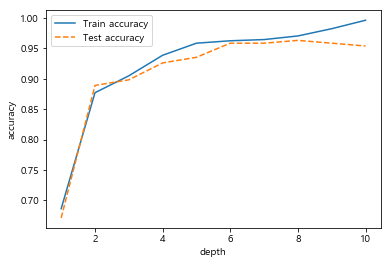

In [25]:
train_accuracy=[]
test_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(max_depth=v_max_depth,n_estimators=50,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['TestScore']=test_accuracy

display(df_accuracy_depth.round(3))

plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()
#depth=4 

,split,TrainScore,TestScore
0,10,0.935,0.931
1,20,0.931,0.926
2,30,0.931,0.931
3,40,0.929,0.926
4,50,0.929,0.926
5,60,0.927,0.926
6,70,0.921,0.931
7,80,0.923,0.921
8,90,0.923,0.912
9,100,0.931,0.917


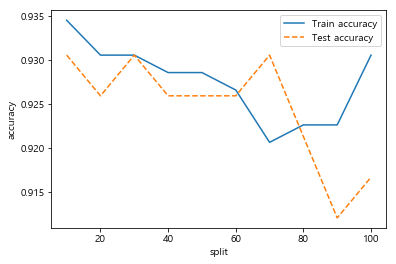

In [26]:
train_accuracy=[]
test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth=4,n_estimators=50,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split']=para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['TestScore']=test_accuracy

display(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('split')
plt.legend()
# split=60

,leaf,TrainScore,TestScore
0,10,0.897,0.889
1,20,0.879,0.889
2,30,0.871,0.889
3,40,0.873,0.889
4,50,0.873,0.889
5,60,0.869,0.884
6,70,0.829,0.856
7,80,0.806,0.824
8,90,0.718,0.708
9,100,0.683,0.671


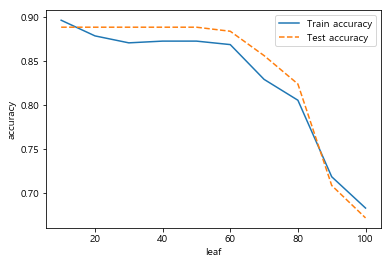

In [27]:
train_accuracy=[]
test_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=4,n_estimators=50,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf']=para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['TestScore']=test_accuracy

display(df_accuracy_leaf.round(3))

plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('leaf')
plt.legend()

#leaf=30

In [28]:
rf_final=RandomForestClassifier(random_state=1234,n_estimators=50,\
                             min_samples_leaf=30 ,max_depth=4)
rf_final.fit(df_train_x,df_train_y)
y_pred=rf_final.predict(df_test_x)
print('accuracy on trainig set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('accuracy on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))



accuracy on trainig set:0.871
accuracy on test set:0.889
confusion matrix:
[[145   0]
 [ 24  47]]


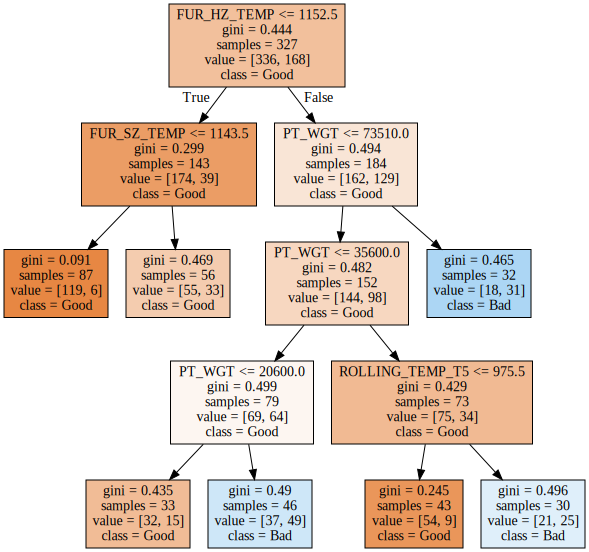

In [29]:
v_feature_names=df_train_x.columns



export_graphviz(rf_final.estimators_[0],out_file='rf_final_0.dot',class_names=['Good','Bad'],\
               feature_names=v_feature_names,impurity=True,filled=True)
with open('rf_final_0.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#양품=0,good

,feature,importance
10,ROLLING_TEMP_T5,0.267
6,FUR_SZ_TEMP,0.104
9,FUR_EXTEMP,0.087
3,PT_WGT,0.051
8,FUR_TIME,0.044
4,FUR_HZ_TEMP,0.043
78,STEEL_KIND_C0,0.042
7,FUR_SZ_TIME,0.042
0,PT_THK,0.038
11,ROLLING_DESCALING,0.034


Text(0,0.5,'변수')

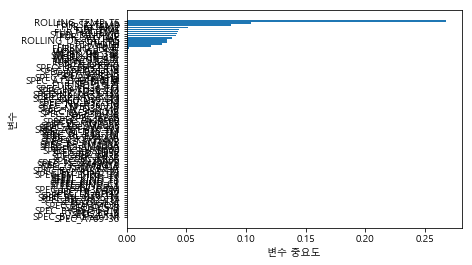

In [30]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=rf_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
display(df_importance.round(3))

df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

#변수 중요도 : ROLLING_TEMP_T5 ,FUR_EXTEMP,FUR_SZ_TEMP ,PT_LTH,FUR_SZ_TIME ,STEEL_KIND_C0,PT_THK,PT_WDTH 
#FUR_HZ_TEMP,FUR_HZ_TIME,FUR_TIME,PT_WGT ,ROLLING_DESCALING ,STEEL_KIND_T8,WORK_GR_3조,WORK_GR_2조,FUR_NO_3호기,
#FUR_NO_1호기

# 로지스틱 회귀분석

In [31]:
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
df['SCALE']=np.where(df['SCALE']=='불량',0,1)

df.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1144,116,1133,59,282,1133,934,적용,8,2조
1,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1144,122,1135,53,283,1135,937,적용,8,2조
2,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1129,116,1121,55,282,1121,889,적용,8,3조
3,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1152,125,1127,68,316,1127,885,적용,8,3조
4,1,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1140,134,1128,48,314,1128,873,적용,8,1조


In [32]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))

print('test data size:{}'.format(df_test.shape))



train data size:(504, 18)
test data size:(216, 18)


In [33]:
#범주형 변수가 많은 spec과 STEEL_KIND변수를 제외하고 모델을 구현한다.

log_model=Logit.from_formula('SCALE ~PT_THK+PT_WDTH+PT_LTH+PT_WGT+C(FUR_NO)+FUR_HZ_TEMP\
+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+C(HSB)+ROLLING_DESCALING+C(WORK_GR)',df_train)
log_result=log_model.fit()
print(log_result.summary())

         Current function value: 0.258733
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      486
Method:                           MLE   Df Model:                           17
Date:                Sun, 12 May 2019   Pseudo R-squ.:                  0.5860
Time:                        00:46:09   Log-Likelihood:                -130.40
converged:                      False   LL-Null:                       -314.97
                                        LLR p-value:                 5.127e-68
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            79.9702   6.92e+05      0.000      1.000   -1.36e+06    1.36e+06
C(FUR_NO)[T.2호기]     -0.1090      0.396     

In [34]:
y_pred=log_result.predict(df_test)
y_pred_class=(y_pred>0.5).astype(int)
print(y_pred_class.head(),'\n')

print('accuracy:{0:.3f}\n'.format(accuracy_score(df_test['SCALE'],y_pred_class)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test['SCALE'],y_pred_class)))


146    0
131    0
650    1
613    0
355    1
dtype: int32 

accuracy:0.861

confusion matrix:
[[ 61  10]
 [ 20 125]]


,Coef
C(HSB)[T.적용],35.447
ROLLING_DESCALING,0.894
C(WORK_GR)[T.3조],0.865
C(WORK_GR)[T.2조],0.792
C(WORK_GR)[T.4조],0.515
C(FUR_NO)[T.3호기],0.398
C(FUR_NO)[T.2호기],0.109
FUR_SZ_TEMP,0.039
PT_THK,0.037
ROLLING_TEMP_T5,0.033


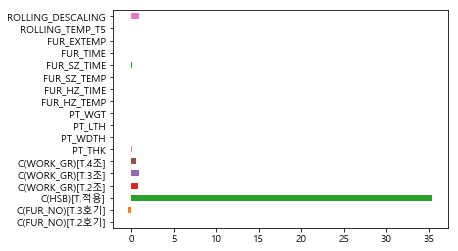

In [35]:
df_reg_coef=pd.DataFrame({'Coef':log_result.params.values[1:]},\
                         index=log_model.exog_names[1:])
a=df_reg_coef.round(3).abs()
a= a.sort_values(["Coef"], ascending=[False])

display(a)
df_reg_coef.plot.barh(y='Coef',legend=False)

In [36]:
#변수 스케일하기

df_char=df.select_dtypes(include='object')
df_numeric=df.select_dtypes(exclude='object')

scaler=StandardScaler()
np_numeric_scaled=scaler.fit_transform(df_numeric)
df_numeric_scaled=pd.DataFrame(np_numeric_scaled,columns=df_numeric.columns)

df_scaled=pd.concat([df_numeric_scaled,df_char],axis=1)
df_scaled.head()


,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR
0,0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.729972,-0.949149,-0.544097,-0.409268,-0.949149,0.000734,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
1,0.687308,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.889399,-0.835252,-0.708951,-0.387221,-0.835252,0.028567,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
2,0.687308,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.729972,-1.632537,-0.654000,-0.409268,-1.632537,-0.416748,-0.19693,NV-E36-TM,T8,2호기,적용,3조
3,0.687308,0.209106,1.568896,-1.095771,-0.944112,-0.160124,0.969113,-1.290843,-0.296815,0.340311,-1.290843,-0.453858,-0.19693,NV-E36-TM,T8,2호기,적용,3조
4,0.687308,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.208255,-1.233894,-0.846330,0.296219,-1.233894,-0.565186,-0.19693,BV-EH36-TM,T8,3호기,적용,1조


In [37]:
#목표변수 0,1로 바꾸기

df_scaled['SCALE']=np.where(df_scaled['SCALE']>0,1,0)
df_scaled.head()

,SCALE,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,ROLLING_DESCALING,SPEC,STEEL_KIND,FUR_NO,HSB,WORK_GR
0,1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.729972,-0.949149,-0.544097,-0.409268,-0.949149,0.000734,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
1,1,0.155812,1.738951,-1.390441,-1.103810,-0.543782,0.889399,-0.835252,-0.708951,-0.387221,-0.835252,0.028567,-0.19693,AB/EH32-TM,T1,1호기,적용,2조
2,1,0.209106,1.568896,-1.095771,-0.944112,-1.263141,0.729972,-1.632537,-0.654000,-0.409268,-1.632537,-0.416748,-0.19693,NV-E36-TM,T8,2호기,적용,3조
3,1,0.209106,1.568896,-1.095771,-0.944112,-0.160124,0.969113,-1.290843,-0.296815,0.340311,-1.290843,-0.453858,-0.19693,NV-E36-TM,T8,2호기,적용,3조
4,1,0.473482,0.562094,-1.518889,-1.174562,-0.735611,1.208255,-1.233894,-0.846330,0.296219,-1.233894,-0.565186,-0.19693,BV-EH36-TM,T8,3호기,적용,1조


In [38]:
#train,valid 나누기
df_scaled_train,df_scaled_test=train_test_split(df_scaled,test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))
print('test data  size:{}'.format(df_test.shape))


train data size:(504, 18)
test data  size:(216, 18)


In [39]:
#model
scaled_log_model=Logit.from_formula('SCALE ~PT_THK+PT_WDTH+PT_LTH+PT_WGT+C(FUR_NO)+FUR_HZ_TEMP\
+FUR_HZ_TIME+FUR_SZ_TEMP+FUR_SZ_TIME+FUR_TIME+FUR_EXTEMP+ROLLING_TEMP_T5+C(HSB)+ROLLING_DESCALING+C(WORK_GR)',df_scaled_train)
scaled_log_result=scaled_log_model.fit()
print(scaled_log_result.summary())

#p값은 0.05보다 작으므로 회귀식은 유의하다
#그러나 R값이 0.3941로 설명력이 좋지는 않다.

         Current function value: 0.258733
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  504
Model:                          Logit   Df Residuals:                      486
Method:                           MLE   Df Model:                           17
Date:                Sun, 12 May 2019   Pseudo R-squ.:                  0.5860
Time:                        00:46:09   Log-Likelihood:                -130.40
converged:                      False   LL-Null:                       -314.97
                                        LLR p-value:                 5.127e-68
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           -31.0946   2.14e+05     -0.000      1.000   -4.19e+05    4.19e+05
C(FUR_NO)[T.2호기]     -0.1090      0.396     

,Coef
C(HSB)[T.적용],35.447
ROLLING_DESCALING,0.894
C(WORK_GR)[T.3조],0.865
C(WORK_GR)[T.2조],0.792
C(WORK_GR)[T.4조],0.515
C(FUR_NO)[T.3호기],0.398
C(FUR_NO)[T.2호기],0.109
FUR_SZ_TEMP,0.039
PT_THK,0.037
ROLLING_TEMP_T5,0.033


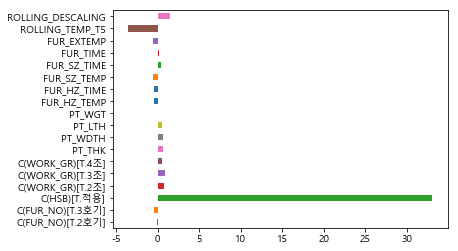

In [40]:
df_reg_coef=pd.DataFrame({'Coef':scaled_log_result.params.values[1:]},\
                         index=scaled_log_model.exog_names[1:])
df_reg_coef.plot.barh(y='Coef',legend=False)

b=df_reg_coef.round(3).abs()
b= a.sort_values(["Coef"], ascending=[False])

display(b)

# 의사결정 트리

In [41]:
# 파일불러오기
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
#필요없는 변수 제거
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
#이상치 제거
df=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]

#양,불->1,0
df['SCALE']=np.where(df['SCALE']=='양품',0,1)

#x,y나누기
df_y=df['SCALE']
df_x=df.drop(['SCALE'],axis=1,inplace=False)

#x변수 더미 처리
df_x=pd.get_dummies(df_x)

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

tree_un=DecisionTreeClassifier(random_state=1234)
print(tree_un.fit(df_train_x,df_train_y),'\n')
print('score on training set:{:.3f}'.format(tree_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(tree_un.score(df_test_x,df_test_y)))

train data x size:(497, 96)
train data y size:(497,)
test data x size:(213, 96)
test data y size:(213,)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best') 

score on training set:1.000
score on test set:0.962


,depth,TrainScore,TestScore
0,1,0.893,0.878
1,2,0.932,0.934
2,3,0.964,0.958
3,4,0.972,0.962
4,5,0.978,0.958
5,6,0.978,0.958
6,7,0.980,0.958
7,8,0.982,0.958
8,9,0.990,0.958
9,10,0.994,0.958


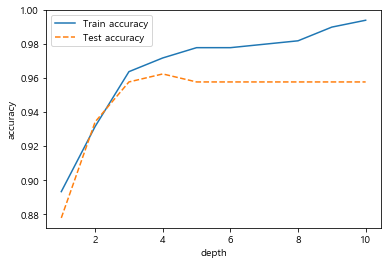

In [42]:
train_accuracy=[]
test_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['TestScore']=test_accuracy

display(df_accuracy_depth.round(3))

plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()

#depth= 4

,split,TrainScore,TestScore
0,10,0.972,0.962
1,20,0.972,0.962
2,30,0.972,0.962
3,40,0.972,0.962
4,50,0.972,0.962
5,60,0.972,0.962
6,70,0.972,0.962
7,80,0.972,0.962
8,90,0.972,0.962
9,100,0.972,0.962


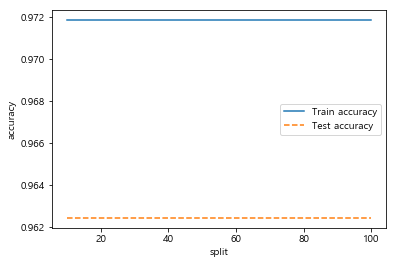

In [43]:
train_accuracy=[]
test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(min_samples_split=v_min_samples_split,max_depth=4,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split']=para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['TestScore']=test_accuracy

display(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('split')
plt.legend()

#split는 testscore의 값이 바뀌지 않는다. 그러므로 파라미터에서 제외한다.

,leaf,TrainScore,TestScore
0,10,0.964,0.958
1,20,0.922,0.901
2,30,0.911,0.864
3,40,0.893,0.878
4,50,0.893,0.878
5,60,0.893,0.878
6,70,0.893,0.878
7,80,0.893,0.878
8,90,0.893,0.878
9,100,0.893,0.878


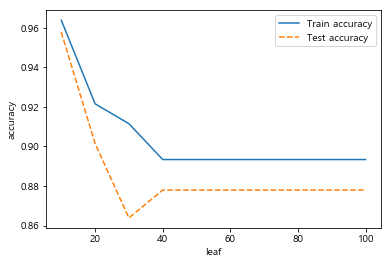

In [44]:
train_accuracy=[]
test_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=4,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf']=para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['TestScore']=test_accuracy

display(df_accuracy_leaf.round(3))

plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('leaf')
plt.legend()

#leaf=40

In [45]:
tree_final=DecisionTreeClassifier(random_state=1234,min_samples_leaf=40 ,max_depth=4)
tree_final.fit(df_train_x,df_train_y)


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=40, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best')

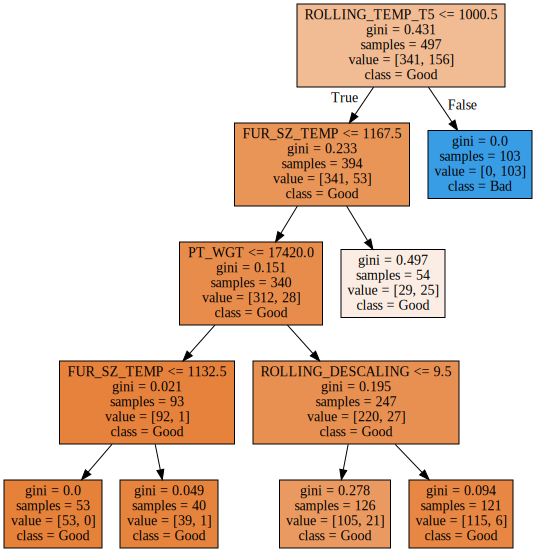

In [46]:
v_feature_names=df_train_x.columns
export_graphviz(tree_final,out_file='tree_final.dot',class_names=['Good','Bad'],feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_final.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#양품=0,good 

In [47]:
y_pred=tree_final.predict(df_test_x)

print('accuracy on test set:{:.3f}'.format(tree_final.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))


accuracy on test set:0.878
confusion matrix:
[[138   0]
 [ 26  49]]


,feature,importance
10,ROLLING_TEMP_T5,0.881
6,FUR_SZ_TEMP,0.097
11,ROLLING_DESCALING,0.012
3,PT_WGT,0.009
0,PT_THK,0.000
62,SPEC_NK-KA,0.000
71,SPEC_NV-D32-TM,0.000
70,SPEC_NV-B,0.000
69,SPEC_NV-A36-TM,0.000
68,SPEC_NV-A32-TM,0.000


Text(0,0.5,'변수')

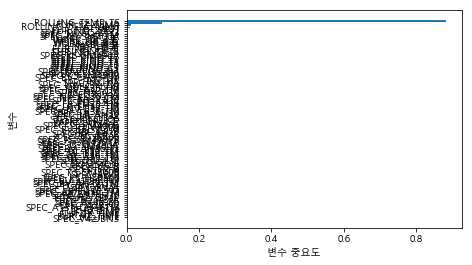

In [48]:
v_feature_names=df_train_x.columns

df_importance=pd.DataFrame()
df_importance['feature']=v_feature_names
df_importance['importance']=tree_final.feature_importances_
df_importance.sort_values('importance',ascending=False,inplace=True)
display(df_importance.round(3))

df_importance.sort_values('importance',ascending=True,inplace=True)
coordinates=range(len(df_importance))
plt.barh(y=coordinates,width=df_importance['importance'])
plt.yticks(coordinates,df_importance['feature'])
plt.xlabel('변수 중요도')
plt.ylabel('변수')

# knn 

In [49]:
# 파일불러오기
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
#필요없는 변수 제거
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
#이상치 제거
df=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]

#양,불->1,0
df['SCALE']=np.where(df['SCALE']=='양품',0,1)

#x,y나누기
df_y=df['SCALE']
df_x=df.drop(['SCALE'],axis=1,inplace=False)

#x변수 더미 처리
df_x=pd.get_dummies(df_x)

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

knn_un=KNeighborsClassifier()
knn_un.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(knn_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(knn_un.score(df_test_x,df_test_y)))

train data x size:(497, 96)
train data y size:(497,)
test data x size:(213, 96)
test data y size:(213,)

score on training set:0.825
score on test set:0.685


N SCORE


,n,TrainScore,TestScore
0,1,1.000,0.690
1,2,0.877,0.690
2,3,0.855,0.700
3,4,0.809,0.685
4,5,0.825,0.685
5,6,0.797,0.700
6,7,0.793,0.685
7,8,0.793,0.695
8,9,0.783,0.728
9,10,0.763,0.709


Text(0.5,0,'n')

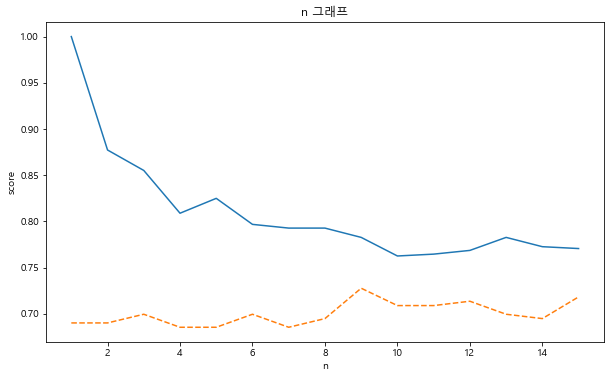

In [50]:
#n 최적 값 찾기
train_score=[]; test_score=[]
para_n=[i for i in range(1,16)]
for v_n_neighbors in para_n:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_score.append(knn.score(df_train_x,df_train_y))
    test_score.append(knn.score(df_test_x,df_test_y))

#n 스코어
print('N SCORE')
df_score_knn = pd.DataFrame()
df_score_knn['n']=para_n
df_score_knn['TrainScore']=train_score
df_score_knn['TestScore']=test_score
display(df_score_knn.round(3))

#n 그래프
fig = plt.figure(figsize=(10, 20)) 
gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[1, 1, 1], 
                       width_ratios=[9])

ax1 = fig.add_subplot(gs[0])
plt.title('n 그래프')
plt.plot(para_n,train_score,linestyle='-',label='Train Score')
plt.plot(para_n,test_score,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('n')

W SCORE


,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
neighbors,,,,
1,1.0,1.000000,0.690141,0.690141
2,1.0,0.877264,0.690141,0.690141
3,1.0,0.855131,0.704225,0.699531
4,1.0,0.808853,0.690141,0.685446
5,1.0,0.824950,0.685446,0.685446
6,1.0,0.796781,0.694836,0.699531
7,1.0,0.792757,0.694836,0.685446
8,1.0,0.792757,0.699531,0.694836
9,1.0,0.782696,0.713615,0.727700


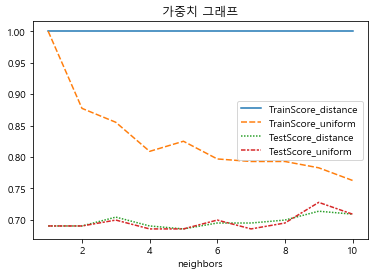

In [51]:
#n=9 를 임의로 설정


#가중치 최적 값 찾기
train_score2=[]; test_score2=[]
para_n=[i for i in range(1,11)]*2
para_w=(['uniform']*10)+(['distance']*10)
for (v_n_neighbors,v_weights) in zip(para_n,para_w):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_score2.append(knn.score(df_train_x,df_train_y))
    test_score2.append(knn.score(df_test_x,df_test_y))

#가중치 스코어
print('W SCORE')
df_score_w = pd.DataFrame()
df_score_w['neighbors']=para_n
df_score_w['weight']=para_w
df_score_w['TrainScore']=train_score2
df_score_w['TestScore']=test_score2


#가중치 표

df_score_w_pivot=df_score_w.pivot(index='neighbors',columns='weight',values=['TrainScore','TestScore'])
level0=df_score_w_pivot.columns.get_level_values(0)
level1=df_score_w_pivot.columns.get_level_values(1)
df_score_w_pivot.columns=level0+'_'+level1
display(df_score_w_pivot)

#가중치 그래프
ax2 = fig.add_subplot(gs[1])
plt.title('가중치 그래프')
sns.lineplot(data=df_score_w_pivot)

#n=9일때 uniform의 testscore가 더 높으므로 uniform을 선택한다.

metric SCORE


,neighbors,metric,TrainScore,TestScore
0,1,minkowski,1.000,0.690
1,2,minkowski,0.877,0.690
2,3,minkowski,0.855,0.700
3,4,minkowski,0.809,0.685
4,5,minkowski,0.825,0.685
5,6,minkowski,0.797,0.700
6,7,minkowski,0.793,0.685
7,8,minkowski,0.793,0.695
8,9,minkowski,0.783,0.728
9,10,minkowski,0.763,0.709


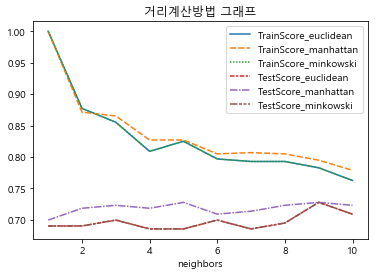

In [52]:
#최적 거리계산 방법 찾기
train_score3=[]; test_score3=[]
para_n=[i for i in range(1,11)]*3
para_m=(['minkowski']*10)+(['euclidean']*10)+(['manhattan']*10)

for (v_n_neighbors,v_metric) in zip(para_n,para_m):
    knn=KNeighborsClassifier(weights='uniform',n_neighbors=v_n_neighbors,metric=v_metric)
    knn.fit(df_train_x,df_train_y)
    train_score3.append(knn.score(df_train_x,df_train_y))
    test_score3.append(knn.score(df_test_x,df_test_y))


                       
#거리계산방법 스코어
print('metric SCORE')
df_score_m = pd.DataFrame()
df_score_m['neighbors']=para_n
df_score_m['metric']=para_m
df_score_m['TrainScore']=train_score3
df_score_m['TestScore']=test_score3
display(df_score_m.round(3))

#거리계산방법 그래프
ax3 = fig.add_subplot(gs[2])
plt.title('거리계산방법 그래프')
df_score_m_pivot=df_score_m.pivot(index='neighbors',columns='metric',values=['TrainScore','TestScore'])
level0=df_score_m_pivot.columns.get_level_values(0)
level1=df_score_m_pivot.columns.get_level_values(1)
df_score_m_pivot.columns=level0+'_'+level1
sns.lineplot(data=df_score_m_pivot)
plt.show()

#train이 낮고 test가 높은 euclidean을 선택한다.

In [53]:
#최종모델
knn_final=KNeighborsClassifier(n_neighbors=9,weights='uniform',metric='euclidean')
knn_final.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(knn_final.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(knn_final.score(df_test_x,df_test_y)))
y_pred=knn_final.predict(df_test_x)
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

score on training set:0.783
score on test set:0.728
confusion matrix:
[[120  18]
 [ 40  35]]


# 최적변수 선택

ROLLING_TEMP_T5

FUR_SZ_TEMP

ROLLING_DESCALING

PT_WGT

FUR_EXTEMP

PT_THK

FUR_HZ_TEMP


# 최종선택한 변수로 모델링

# 로지스틱 회귀분석

In [54]:
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
df['SCALE']=np.where(df['SCALE']=='불량',0,1)
df=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]


df.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
0,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1144,116,1133,59,282,1133,934,적용,8,2조
1,1,AB/EH32-TM,T1,32.25,3707,15109,14180,1호기,1144,122,1135,53,283,1135,937,적용,8,2조
2,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1129,116,1121,55,282,1121,889,적용,8,3조
3,1,NV-E36-TM,T8,33.27,3619,19181,18130,2호기,1152,125,1127,68,316,1127,885,적용,8,3조
4,1,BV-EH36-TM,T8,38.33,3098,13334,12430,3호기,1140,134,1128,48,314,1128,873,적용,8,1조


In [55]:
df_train,df_test=train_test_split(df,test_size=0.3,random_state=1234)
print('train data size:{}'.format(df_train.shape))

print('test data size:{}'.format(df_test.shape))



train data size:(497, 18)
test data size:(213, 18)


In [56]:
df_train.head()

,SCALE,SPEC,STEEL_KIND,PT_THK,PT_WDTH,PT_LTH,PT_WGT,FUR_NO,FUR_HZ_TEMP,FUR_HZ_TIME,FUR_SZ_TEMP,FUR_SZ_TIME,FUR_TIME,FUR_EXTEMP,ROLLING_TEMP_T5,HSB,ROLLING_DESCALING,WORK_GR
153,0,JS-SS400,C0,35.15,2466,31229,106250,3호기,1164,79,1167,61,296,1167,1062,적용,8,3조
231,0,JS-SS400,C0,40.16,2463,16858,39270,2호기,1139,103,1147,51,267,1147,1034,적용,6,2조
604,0,SA283-C,C0,20.18,2240,39679,84480,3호기,1170,78,1159,59,342,1159,1044,적용,8,3조
286,1,NV-A,C0,24.18,2848,31724,17150,2호기,1136,49,1160,71,262,1160,976,적용,8,4조
58,1,COMMON,T8,65.69,2498,11978,15430,3호기,1138,99,1129,86,352,1129,847,적용,6,2조


In [57]:
# #범주형 변수가 많은 spec과 STEEL_KIND변수를 제외하고 모델을 구현한다.

log_model=Logit.from_formula('SCALE ~ ROLLING_TEMP_T5+ROLLING_DESCALING+PT_WGT+FUR_EXTEMP+PT_THK+FUR_HZ_TEMP', df_train)

log_result=log_model.fit()
print(log_result.summary())



Optimization terminated successfully.
         Current function value: 0.398697
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  SCALE   No. Observations:                  497
Model:                          Logit   Df Residuals:                      490
Method:                           MLE   Df Model:                            6
Date:                Sun, 12 May 2019   Pseudo R-squ.:                  0.3592
Time:                        00:46:15   Log-Likelihood:                -198.15
converged:                       True   LL-Null:                       -309.22
                                        LLR p-value:                 3.648e-45
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            98.7692     16.030      6.161      0.000      67.351     130.188
ROLLING_

In [58]:
#x,y나누기
df_y=df['SCALE']
df_x=df[['ROLLING_TEMP_T5','FUR_SZ_TEMP','ROLLING_DESCALING','PT_WGT','FUR_EXTEMP','PT_THK','FUR_HZ_TEMP']]

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

train data x size:(497, 7)
train data y size:(497,)
test data x size:(213, 7)
test data y size:(213,)



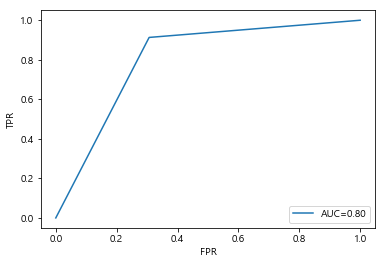

In [59]:
from sklearn.linear_model import LogisticRegression

model=['logistic','Decision Tree','RandomForest','knn']
train_accuracy1=[]; test_accuracy1=[]
model_f1_score=[]
model_auc=[]

df_model= LogisticRegression()
df_model.fit(df_train_x,df_train_y)
train_accuracy1.append(df_model.score(df_train_x,df_train_y))
test_accuracy1.append(df_model.score(df_test_x,df_test_y))


y_pred=df_model.predict(df_test_x)
fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)

plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

# 의사결정트리

In [60]:
# 파일불러오기
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
#필요없는 변수 제거
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
#이상치 제거
df=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]

#양,불->1,0
df['SCALE']=np.where(df['SCALE']=='양품',0,1)

#x,y나누기
df_y=df['SCALE']
df_x=df[['ROLLING_TEMP_T5','FUR_SZ_TEMP','ROLLING_DESCALING','PT_WGT','FUR_EXTEMP','PT_THK','FUR_HZ_TEMP']]

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

tree_un=DecisionTreeClassifier(random_state=1234)
print(tree_un.fit(df_train_x,df_train_y),'\n')
print('score on training set:{:.3f}'.format(tree_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(tree_un.score(df_test_x,df_test_y)))

train data x size:(497, 7)
train data y size:(497,)
test data x size:(213, 7)
test data y size:(213,)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=1234,
            splitter='best') 

score on training set:1.000
score on test set:0.901


,depth,TrainScore,TestScore
0,1,0.893,0.878
1,2,0.928,0.901
2,3,0.936,0.906
3,4,0.936,0.906
4,5,0.944,0.906
5,6,0.948,0.906
6,7,0.962,0.915
7,8,0.972,0.915
8,9,0.982,0.901
9,10,0.986,0.901


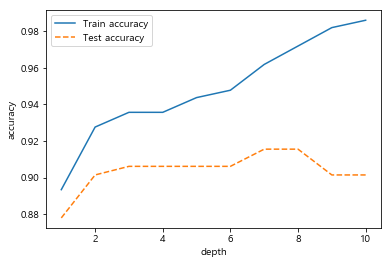

In [61]:
train_accuracy=[]
test_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    tree=DecisionTreeClassifier(max_depth=v_max_depth,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['TestScore']=test_accuracy

display(df_accuracy_depth.round(3))

plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()

#depth= 3 과적합 방지

,split,TrainScore,TestScore
0,10,0.936,0.906
1,20,0.936,0.906
2,30,0.936,0.906
3,40,0.936,0.906
4,50,0.936,0.906
5,60,0.936,0.906
6,70,0.936,0.906
7,80,0.936,0.906
8,90,0.936,0.906
9,100,0.936,0.906


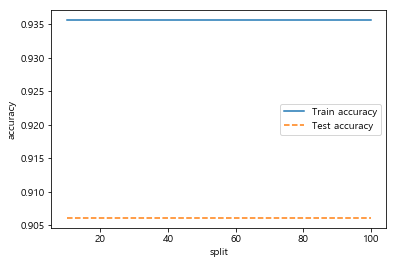

In [62]:
train_accuracy=[]
test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    tree=DecisionTreeClassifier(min_samples_split=v_min_samples_split,max_depth=3,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split']=para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['TestScore']=test_accuracy

display(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('split')
plt.legend()

#split는 testscore의 값이 바뀌지 않는다. 그러므로 파라미터에서 제외한다.

,leaf,TrainScore,TestScore
0,10,0.928,0.901
1,20,0.922,0.901
2,30,0.911,0.864
3,40,0.893,0.878
4,50,0.893,0.878
5,60,0.893,0.878
6,70,0.893,0.878
7,80,0.893,0.878
8,90,0.893,0.878
9,100,0.893,0.878


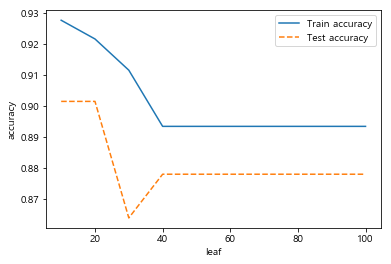

In [63]:
train_accuracy=[]
test_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    tree=DecisionTreeClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=3,random_state=1234)
    tree.fit(df_train_x,df_train_y)
    train_accuracy.append(tree.score(df_train_x,df_train_y))
    test_accuracy.append(tree.score(df_test_x,df_test_y))
                      
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf']=para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['TestScore']=test_accuracy

display(df_accuracy_leaf.round(3))

plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('leaf')
plt.legend()

#leaf=20

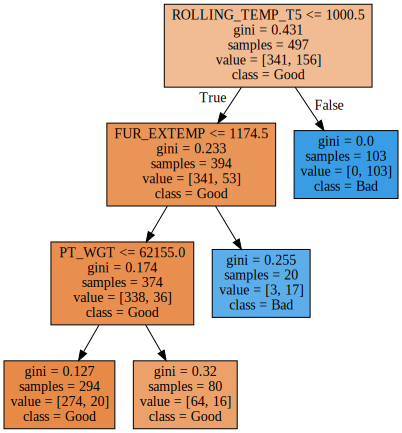

accuracy on test set:0.901
confusion matrix:
[[138   0]
 [ 21  54]]


In [64]:
v_feature_names=df_train_x.columns
tree_final=DecisionTreeClassifier(random_state=1234,min_samples_leaf=20 ,max_depth=3)
tree_final.fit(df_train_x,df_train_y)
export_graphviz(tree_final,out_file='tree_final.dot',class_names=['Good','Bad'],\
               feature_names=v_feature_names,impurity=True,filled=True)
with open('tree_final.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))


y_pred=tree_final.predict(df_test_x)

print('accuracy on test set:{:.3f}'.format(tree_final.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))

#양품=0,good 

[0.8430583501006036, 0.9275653923541247] [0.8356807511737089, 0.9014084507042254]


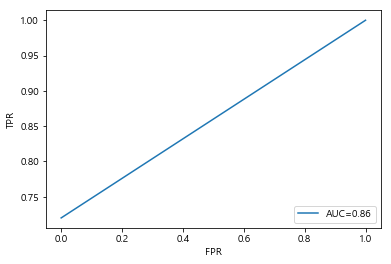

In [65]:
df_model=DecisionTreeClassifier(max_depth=3,min_samples_leaf=10)
df_model.fit(df_train_x,df_train_y)
train_accuracy1.append(df_model.score(df_train_x,df_train_y))
test_accuracy1.append(df_model.score(df_test_x,df_test_y))

print(train_accuracy1,test_accuracy1)
y_pred=df_model.predict(df_test_x)
fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)

plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

# 랜덤포레스트

In [66]:
# 파일불러오기
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
#필요없는 변수 제거
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
#이상치 제거
df=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]

#양,불->1,0
df['SCALE']=np.where(df['SCALE']=='양품',0,1)

#x,y나누기
df_y=df['SCALE']
df_x=df[['ROLLING_TEMP_T5','FUR_SZ_TEMP','ROLLING_DESCALING','PT_WGT','FUR_EXTEMP','PT_THK','FUR_HZ_TEMP']]

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

tree_un=RandomForestClassifier(random_state=1234)
print(tree_un.fit(df_train_x,df_train_y),'\n')
print('score on training set:{:.3f}'.format(tree_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(tree_un.score(df_test_x,df_test_y)))

train data x size:(497, 7)
train data y size:(497,)
test data x size:(213, 7)
test data y size:(213,)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=1234, verbose=0,
            warm_start=False) 

score on training set:0.994
score on test set:0.911


,n_estimator,TrainScore,TestScore
0,10,0.994,0.911
1,20,1.000,0.901
2,30,1.000,0.906
3,40,1.000,0.906
4,50,1.000,0.901
5,60,1.000,0.901
6,70,1.000,0.901
7,80,1.000,0.906
8,90,1.000,0.906
9,100,1.000,0.906


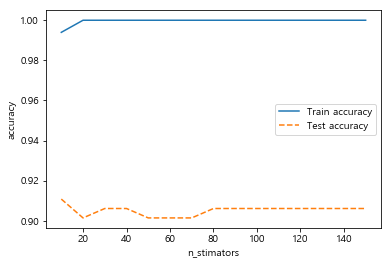

In [67]:
train_accuracy=[]
test_accuracy=[]
para_n_tree=[n_tree*10 for n_tree in range(1,16)]

for v_n_estimators in para_n_tree:
    rf=RandomForestClassifier(n_estimators=v_n_estimators,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_n = pd.DataFrame()
df_accuracy_n['n_estimator']=para_n_tree
df_accuracy_n['TrainScore']=train_accuracy
df_accuracy_n['TestScore']=test_accuracy

display(df_accuracy_n.round(3))

plt.plot(para_n_tree, train_accuracy, linestyle='-', label='Train accuracy')
plt.plot(para_n_tree, test_accuracy, linestyle='--', label='Test accuracy')
plt.ylabel('accuracy')
plt.xlabel('n_stimators')
plt.legend()

#n=10

,depth,TrainScore,TestScore
0,1,0.863,0.840
1,2,0.899,0.883
2,3,0.928,0.901
3,4,0.936,0.901
4,5,0.948,0.911
5,6,0.954,0.897
6,7,0.970,0.892
7,8,0.986,0.915
8,9,0.988,0.915
9,10,0.988,0.915


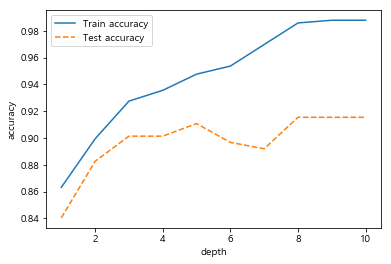

In [68]:
train_accuracy=[]
test_accuracy=[]
para_depth=[depth for depth in range(1,11)]

for v_max_depth in para_depth:
    rf=RandomForestClassifier(max_depth=v_max_depth,n_estimators=10,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_depth = pd.DataFrame()
df_accuracy_depth['depth']=para_depth
df_accuracy_depth['TrainScore']=train_accuracy
df_accuracy_depth['TestScore']=test_accuracy

display(df_accuracy_depth.round(3))

plt.plot(para_depth,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_depth,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('depth')
plt.legend()
#depth=5

,split,TrainScore,TestScore
0,10,0.952,0.911
1,20,0.944,0.911
2,30,0.946,0.906
3,40,0.934,0.901
4,50,0.938,0.901
5,60,0.936,0.906
6,70,0.928,0.901
7,80,0.926,0.901
8,90,0.926,0.901
9,100,0.926,0.901


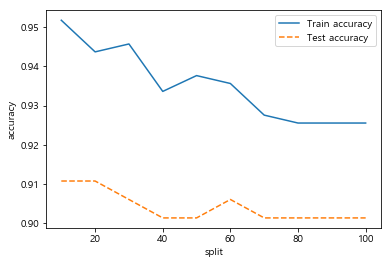

In [69]:
train_accuracy=[]
test_accuracy=[]
para_split=[n_split*10 for n_split in range(1,11)]

for v_min_samples_split in para_split:
    rf=RandomForestClassifier(min_samples_split=v_min_samples_split,max_depth=5,n_estimators=10,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_split = pd.DataFrame()
df_accuracy_split['split']=para_split
df_accuracy_split['TrainScore']=train_accuracy
df_accuracy_split['TestScore']=test_accuracy

display(df_accuracy_split.round(3))

plt.plot(para_split,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_split,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('split')
plt.legend()
# split=50

,leaf,TrainScore,TestScore
0,10,0.926,0.901
1,20,0.903,0.883
2,30,0.885,0.873
3,40,0.883,0.873
4,50,0.879,0.869
5,60,0.877,0.859
6,70,0.855,0.850
7,80,0.833,0.826
8,90,0.821,0.826
9,100,0.817,0.803


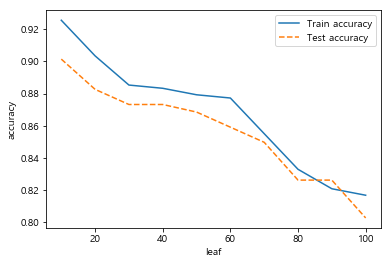

In [70]:
train_accuracy=[]
test_accuracy=[]
para_leaf=[n_leaf*10 for n_leaf in range(1,11)]

for v_min_samples_leaf in para_leaf:
    rf=RandomForestClassifier(min_samples_leaf=v_min_samples_leaf,max_depth=5,min_samples_split=50,\
                              n_estimators=10,random_state=1234)
    rf.fit(df_train_x,df_train_y)
    train_accuracy.append(rf.score(df_train_x,df_train_y))
    test_accuracy.append(rf.score(df_test_x,df_test_y))
                      
df_accuracy_leaf = pd.DataFrame()
df_accuracy_leaf['leaf']=para_leaf
df_accuracy_leaf['TrainScore']=train_accuracy
df_accuracy_leaf['TestScore']=test_accuracy

display(df_accuracy_leaf.round(3))

plt.plot(para_leaf,train_accuracy,linestyle='-',label='Train accuracy')
plt.plot(para_leaf,test_accuracy,linestyle='--',label='Test accuracy')
plt.ylabel('accuracy'); plt.xlabel('leaf')
plt.legend()

#leaf=20

In [71]:
rf_final=RandomForestClassifier(random_state=1234,n_estimators=10,\
                             min_samples_leaf=20 ,max_depth=5,min_samples_split=50)
rf_final.fit(df_train_x,df_train_y)
y_pred=rf_final.predict(df_test_x)
print('accuracy on trainig set:{:.3f}'.format(rf_final.score(df_train_x,df_train_y)))
print('accuracy on test set:{:.3f}'.format(rf_final.score(df_test_x,df_test_y)))
print('confusion matrix:\n{}'.format(confusion_matrix(df_test_y,y_pred)))



accuracy on trainig set:0.903
accuracy on test set:0.883
confusion matrix:
[[136   2]
 [ 23  52]]


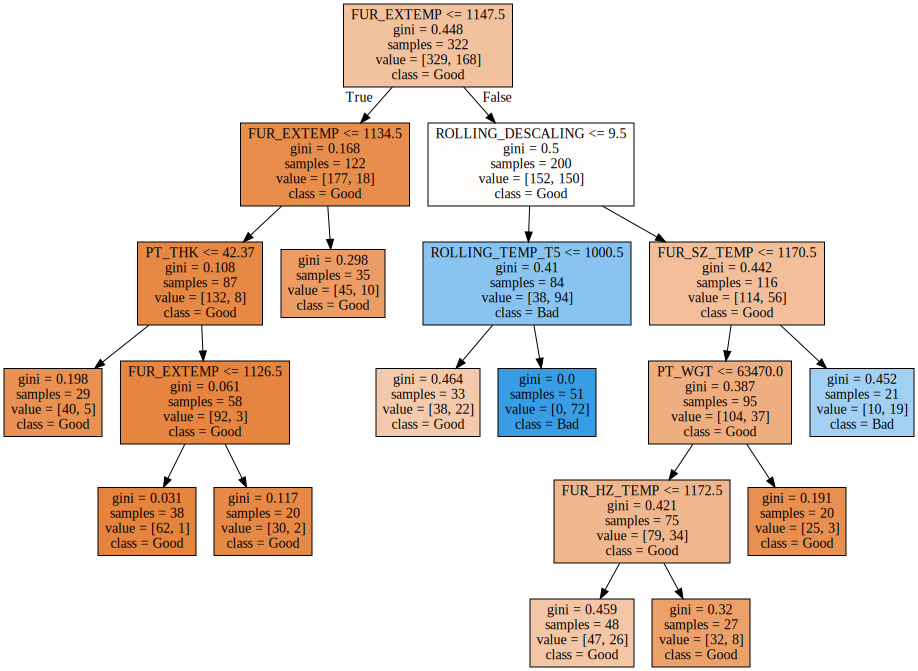

In [72]:
v_feature_names=df_train_x.columns



export_graphviz(rf_final.estimators_[0],out_file='rf_final_0.dot',class_names=['Good','Bad'],\
               feature_names=v_feature_names,impurity=True,filled=True)
with open('rf_final_0.dot')as f:
    dot_graph=f.read()
display(graphviz.Source(dot_graph))

#양품=0,good

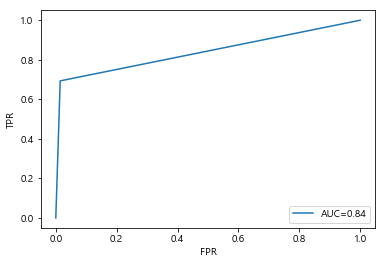

In [73]:
rf_model=RandomForestClassifier(random_state=1234,n_estimators=10,\
                             min_samples_leaf=20 ,max_depth=5,min_samples_split=50)
rf_model.fit(df_train_x,df_train_y)
train_accuracy1.append(rf_model.score(df_train_x,df_train_y))
test_accuracy1.append(rf_model.score(df_test_x,df_test_y))
y_pred=rf_model.predict(df_test_x)
fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)


plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

# knn

In [74]:
# 파일불러오기
df=pd.read_csv('SCALE불량.csv',engine='python',encoding='949')
#필요없는 변수 제거
df=df.drop(['PLATE_NO','ROLLING_DATE','FUR_NO_ROW'],axis=1)
#이상치 제거
df=df[(df['ROLLING_TEMP_T5']>100) & (df['PT_WGT']<115000) & (df['FUR_SZ_TIME']<250) &(df['FUR_HZ_TIME']<300)]

#양,불->1,0
df['SCALE']=np.where(df['SCALE']=='양품',0,1)

#x,y나누기
#x,y나누기
df_y=df['SCALE']
df_x=df[['ROLLING_TEMP_T5','FUR_SZ_TEMP','ROLLING_DESCALING','PT_WGT','FUR_EXTEMP','PT_THK','FUR_HZ_TEMP']]

#x변수 더미 처리
df_x=pd.get_dummies(df_x)

#train,valid 나누기
df_train_x,df_test_x,df_train_y,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data x size:{}'.format(df_train_x.shape))
print('train data y size:{}'.format(df_train_y.shape))
print('test data x size:{}'.format(df_test_x.shape))
print('test data y size:{}\n'.format(df_test_y.shape))

knn_un=KNeighborsClassifier()
knn_un.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(knn_un.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(knn_un.score(df_test_x,df_test_y)))

train data x size:(497, 7)
train data y size:(497,)
test data x size:(213, 7)
test data y size:(213,)

score on training set:0.809
score on test set:0.690


N SCORE


,n,TrainScore,TestScore
0,1,1.000,0.690
1,2,0.855,0.709
2,3,0.843,0.695
3,4,0.803,0.718
4,5,0.809,0.690
5,6,0.793,0.700
6,7,0.801,0.700
7,8,0.789,0.709
8,9,0.785,0.723
9,10,0.771,0.676


Text(0.5,0,'n')

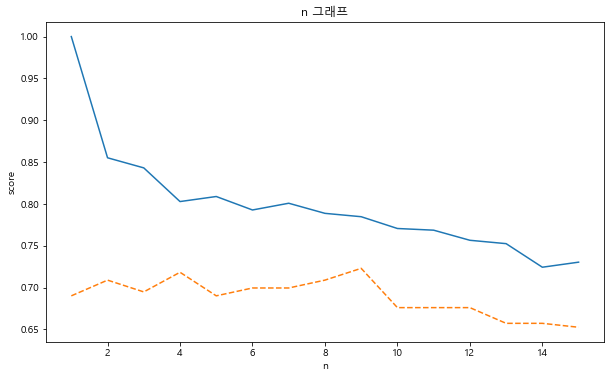

In [75]:
#n 최적 값 찾기
train_score=[]; test_score=[]
para_n=[i for i in range(1,16)]
for v_n_neighbors in para_n:
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_score.append(knn.score(df_train_x,df_train_y))
    test_score.append(knn.score(df_test_x,df_test_y))

#n 스코어
print('N SCORE')
df_score_knn = pd.DataFrame()
df_score_knn['n']=para_n
df_score_knn['TrainScore']=train_score
df_score_knn['TestScore']=test_score
display(df_score_knn.round(3))

#n 그래프
fig = plt.figure(figsize=(10, 20)) 
gs = gridspec.GridSpec(nrows=3, # row 몇 개 
                       ncols=1, # col 몇 개 
                       height_ratios=[1, 1, 1], 
                       width_ratios=[9])

ax1 = fig.add_subplot(gs[0])
plt.title('n 그래프')
plt.plot(para_n,train_score,linestyle='-',label='Train Score')
plt.plot(para_n,test_score,linestyle='--',label='Test Score')
plt.ylabel('score'); plt.xlabel('n')

# n=4

W SCORE


,TrainScore_distance,TrainScore_uniform,TestScore_distance,TestScore_uniform
neighbors,,,,
1,1.0,1.000000,0.690141,0.690141
2,1.0,0.855131,0.690141,0.708920
3,1.0,0.843058,0.685446,0.694836
4,1.0,0.802817,0.685446,0.718310
5,1.0,0.808853,0.699531,0.690141
6,1.0,0.792757,0.685446,0.699531
7,1.0,0.800805,0.694836,0.699531
8,1.0,0.788732,0.699531,0.708920
9,1.0,0.784708,0.699531,0.723005


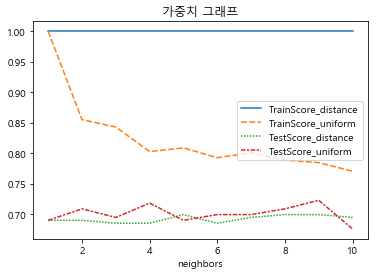

In [76]:
#n=9 를 임의로 설정


#가중치 최적 값 찾기
train_score2=[]; test_score2=[]
para_n=[i for i in range(1,11)]*2
para_w=(['uniform']*10)+(['distance']*10)
for (v_n_neighbors,v_weights) in zip(para_n,para_w):
    knn=KNeighborsClassifier(n_neighbors=v_n_neighbors,weights=v_weights)
    knn.fit(df_train_x,df_train_y)
    train_score2.append(knn.score(df_train_x,df_train_y))
    test_score2.append(knn.score(df_test_x,df_test_y))

#가중치 스코어
print('W SCORE')
df_score_w = pd.DataFrame()
df_score_w['neighbors']=para_n
df_score_w['weight']=para_w
df_score_w['TrainScore']=train_score2
df_score_w['TestScore']=test_score2


#가중치 표

df_score_w_pivot=df_score_w.pivot(index='neighbors',columns='weight',values=['TrainScore','TestScore'])
level0=df_score_w_pivot.columns.get_level_values(0)
level1=df_score_w_pivot.columns.get_level_values(1)
df_score_w_pivot.columns=level0+'_'+level1
display(df_score_w_pivot)

#가중치 그래프
ax2 = fig.add_subplot(gs[1])
plt.title('가중치 그래프')
sns.lineplot(data=df_score_w_pivot)

#n=4일때 uniform의 testscore가 더 높으므로 uniform을 선택한다.

metric SCORE


,neighbors,metric,TrainScore,TestScore
0,1,minkowski,1.000,0.690
1,2,minkowski,0.855,0.709
2,3,minkowski,0.843,0.695
3,4,minkowski,0.803,0.718
4,5,minkowski,0.809,0.690
5,6,minkowski,0.793,0.700
6,7,minkowski,0.801,0.700
7,8,minkowski,0.789,0.709
8,9,minkowski,0.785,0.723
9,10,minkowski,0.771,0.676


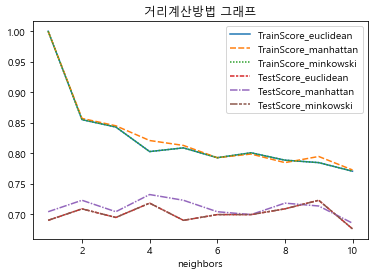

In [77]:
#최적 거리계산 방법 찾기
train_score3=[]; test_score3=[]
para_n=[i for i in range(1,11)]*3
para_m=(['minkowski']*10)+(['euclidean']*10)+(['manhattan']*10)

for (v_n_neighbors,v_metric) in zip(para_n,para_m):
    knn=KNeighborsClassifier(weights='uniform',n_neighbors=v_n_neighbors,metric=v_metric)
    knn.fit(df_train_x,df_train_y)
    train_score3.append(knn.score(df_train_x,df_train_y))
    test_score3.append(knn.score(df_test_x,df_test_y))


                       
#거리계산방법 스코어
print('metric SCORE')
df_score_m = pd.DataFrame()
df_score_m['neighbors']=para_n
df_score_m['metric']=para_m
df_score_m['TrainScore']=train_score3
df_score_m['TestScore']=test_score3
display(df_score_m.round(3))

#거리계산방법 그래프
ax3 = fig.add_subplot(gs[2])
plt.title('거리계산방법 그래프')
df_score_m_pivot=df_score_m.pivot(index='neighbors',columns='metric',values=['TrainScore','TestScore'])
level0=df_score_m_pivot.columns.get_level_values(0)
level1=df_score_m_pivot.columns.get_level_values(1)
df_score_m_pivot.columns=level0+'_'+level1
sns.lineplot(data=df_score_m_pivot)
plt.show()

#train이 낮고 test가 높은 manhattan을 선택한다.

In [78]:
#최종모델
knn_final=KNeighborsClassifier(n_neighbors=4,weights='uniform',metric='manhattan')
knn_final.fit(df_train_x,df_train_y)
print('score on training set:{:.3f}'.format(knn_final.score(df_train_x,df_train_y)))
print('score on test set:{:.3f}'.format(knn_final.score(df_test_x,df_test_y)))
y_pred=knn_final.predict(df_test_x)

score on training set:0.821
score on test set:0.732


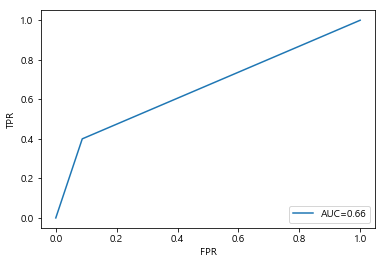

In [79]:
knn_model=KNeighborsClassifier(n_neighbors=4,weights='uniform',metric='manhattan')
knn_model.fit(df_train_x,df_train_y)
train_accuracy1.append(knn_model.score(df_train_x,df_train_y))
test_accuracy1.append(knn_model.score(df_test_x,df_test_y))
y_pred=knn_model.predict(df_test_x)
fpr,tpr,thresholds=roc_curve(df_test_y,y_pred)
roc_auc=auc(fpr,tpr)
model_auc.append(roc_auc)




plt.plot(fpr,tpr,label='AUC=%0.2f'%roc_auc)
plt.legend(loc='lower right')
plt.ylabel('TPR'); plt.xlabel('FPR')
plt.show()

model_f1_score.append(f1_score(df_test_y,y_pred))

,trainaccuracy,testaccuracy,f1score,auc
logistic,0.843,0.836,0.878,0.803
Decision Tree,0.928,0.901,0.837,0.860
RandomForest,0.903,0.883,0.806,0.839
knn,0.821,0.732,0.513,0.657


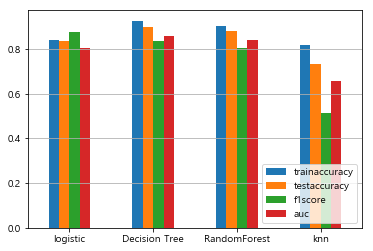

In [80]:

df_eval=pd.DataFrame(index=model)
df_eval['trainaccuracy']=train_accuracy1
df_eval['testaccuracy']=test_accuracy1
df_eval['f1score']=model_f1_score
df_eval['auc']=model_auc
display(df_eval.round(3))


df_eval.plot.bar(rot=0)
plt.legend(loc='lower right')
plt.grid(axis='y')